<a href="https://colab.research.google.com/github/AdityaKalkeri/Evaluation_Projects/blob/main/Project9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving upload.csv to upload.csv


In [4]:
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['upload.csv'])) 
df.head()

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,Alabama,US,2020-05-29 02:32:58,32.3182,-86.9023,16530,591,9355.0,6584.0,1.0,337.127806,200481.0,1765.0,3.575318,84000001.0,USA,4088.791265,10.677556
1,1,Alaska,US,2020-05-29 02:32:58,61.3707,-152.4044,424,10,366.0,48.0,2.0,57.959524,47970.0,NaN,2.358491,84000002.0,USA,6557.354640,NaN
2,2,American Samoa,US,2020-05-29 02:32:58,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,174.0,NaN,NaN,16.0,ASM,312.719038,NaN
3,3,Arizona,US,2020-05-29 02:32:58,33.7298,-111.4312,17877,860,4452.0,12565.0,4.0,245.606472,202914.0,2848.0,4.810651,84000004.0,USA,2787.771526,15.931085
4,4,Arkansas,US,2020-05-29 02:32:58,34.9697,-92.3731,6538,125,4583.0,1830.0,5.0,216.647602,118902.0,640.0,1.911900,84000005.0,USA,3940.017311,9.788926


In [5]:
df.shape

(6514, 19)

In [6]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [7]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
6509,Virginia,US,2020-07-04 04:34:04,37.7693,-78.1700,64393,1845,8711.0,53837.0,51.0,754.412239,688360.0,9529.0,2.865218,84000051.0,USA,8064.653128,14.798192
6510,Washington,US,2020-07-04 04:34:04,47.4009,-121.4905,34778,1352,NaN,33426.0,53.0,456.710291,584989.0,4442.0,3.887515,84000053.0,USA,7682.169664,12.772442
6511,West Virginia,US,2020-07-04 04:34:04,38.4912,-80.9545,3126,93,2396.0,637.0,54.0,174.427656,180702.0,NaN,2.975048,84000054.0,USA,10082.989844,NaN
6512,Wisconsin,US,2020-07-04 04:34:04,44.2685,-89.6165,30317,796,24043.0,5478.0,55.0,520.692892,606984.0,3555.0,2.625590,84000055.0,USA,10424.918513,11.726094
6513,Wyoming,US,2020-07-04 04:34:04,42.7560,-107.3025,1582,20,1154.0,408.0,56.0,273.343481,35275.0,119.0,1.264223,84000056.0,USA,6094.937617,7.522124


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        6514 non-null   object 
 1   Country_Region        6514 non-null   object 
 2   Last_Update           6495 non-null   object 
 3   Lat                   6272 non-null   float64
 4   Long_                 6272 non-null   float64
 5   Confirmed             6514 non-null   int64  
 6   Deaths                6514 non-null   int64  
 7   Recovered             4967 non-null   float64
 8   Active                6497 non-null   float64
 9   FIPS                  6495 non-null   float64
 10  Incident_Rate         6272 non-null   float64
 11  People_Tested         6272 non-null   float64
 12  People_Hospitalized   4167 non-null   float64
 13  Mortality_Rate        6384 non-null   float64
 14  UID                   6514 non-null   float64
 15  ISO3                 

Province =  USA States

Country_Region = US

Last_Update = When the data was uploaded

lat = Latitude

Long_ = Longitude

Confirmed = No of confirmed cases

Active = No of active cases

Recovered = No of recovered cases

Death = No of deaths due to COVID 19

FIPS = Counties of US unique number

Incident_Rate = Confirmed cases per 100000

People_Tested = Total Test Performed

People_Hospitalized = No of people in Hosp due to COVID 19

Mortality_Rate = (No of Deaths/Confirmed cases) * 100

UID = Row entry

ISO#3 = Official county code

Testing_Rate = Testing per 100000 people

Hospitalization_Rate = (People in Hospital/COnfirmed cases) * 100

In [9]:
df.isnull().sum()

Province_State             0
Country_Region             0
Last_Update               19
Lat                      242
Long_                    242
Confirmed                  0
Deaths                     0
Recovered               1547
Active                    17
FIPS                      19
Incident_Rate            242
People_Tested            242
People_Hospitalized     2347
Mortality_Rate           130
UID                        0
ISO3                       0
Testing_Rate             242
Hospitalization_Rate    2347
dtype: int64

In [10]:
df[np.isnan(df['FIPS'])]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
348,Recovered,US,NaN,NaN,NaN,0,0,64840.0,-64840.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN
697,Recovered,US,2020-04-24 03:33:00,NaN,NaN,0,0,80203.0,-80203.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN
756,Recovered,US,2020-04-27 02:32:46,NaN,NaN,0,0,106988.0,-106988.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN
815,Recovered,US,NaN,NaN,NaN,0,0,43482.0,-43482.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN
1048,Recovered,US,NaN,NaN,NaN,0,0,70337.0,-70337.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN
1397,Recovered,US,NaN,NaN,NaN,0,0,72329.0,-72329.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN
1572,Recovered,US,2020-04-28 02:32:46,NaN,NaN,0,0,111424.0,-111424.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN
1630,Recovered,US,NaN,NaN,NaN,0,0,32988.0,-32988.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN
1631,Virgin Islands,US,NaN,18.3358,-64.8963,51,1,43.0,50.0,NaN,47.544468,350.0,3.0,1.960784,850.0,VIR,326.285565,5.882353
1748,Recovered,US,2020-04-26 02:32:45,NaN,NaN,0,0,100372.0,-100372.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN


In [11]:
df = df[df['Province_State'] != 'Recovered']

In [12]:
df[df['Province_State'] == 'Virgin Islands']["FIPS"].iloc[0]

78.0

In [13]:
df['FIPS'].fillna(78.0, inplace = True)

In [14]:
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

In [15]:
df[np.isnan(df['Last_Update'])]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
292,American Samoa,US,NaT,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN
759,American Samoa,US,NaT,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN
992,American Samoa,US,NaT,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN
1341,American Samoa,US,NaT,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN
1628,American Samoa,US,NaT,-14.2710,-170.1322,0,0,NaN,0.0,60.0,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN
1631,Virgin Islands,US,NaT,18.3358,-64.8963,51,1,43.0,50.0,78.0,47.544468,350.0,3.0,1.960784,850.0,VIR,326.285565,5.882353
2274,American Samoa,US,NaT,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN
3087,American Samoa,US,NaT,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN
3437,American Samoa,US,NaT,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN
3670,American Samoa,US,NaT,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16.0,ASM,5.391708,NaN


In [16]:
df = df[df['Province_State'] != 'American Samoa']

In [17]:
df.loc[1629]

Province_State          Northern Mariana Islands
Country_Region                                US
Last_Update                  2020-04-12 23:18:15
Lat                                      15.0979
Long_                                    145.674
Confirmed                                     11
Deaths                                         2
Recovered                                    NaN
Active                                         9
FIPS                                          69
Incident_Rate                            19.9478
People_Tested                                 38
People_Hospitalized                          NaN
Mortality_Rate                           18.1818
UID                                          580
ISO3                                         MNP
Testing_Rate                             68.9105
Hospitalization_Rate                         NaN
Name: 1629, dtype: object

In [18]:
df['Last_Update'].fillna('2020-04-12 23:18:15', inplace = True)

In [19]:
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

In [20]:
df.isnull().sum()

Province_State             0
Country_Region             0
Last_Update                0
Lat                      224
Long_                    224
Confirmed                  0
Deaths                     0
Recovered               1440
Active                     0
FIPS                       0
Incident_Rate            224
People_Tested            224
People_Hospitalized     2217
Mortality_Rate             0
UID                        0
ISO3                       0
Testing_Rate             224
Hospitalization_Rate    2217
dtype: int64

In [21]:
df[df['Lat'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-29 02:32:58,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN
13,Grand Princess,US,2020-05-29 02:32:58,NaN,NaN,103,3,NaN,100.0,99999.0,NaN,NaN,NaN,2.912621,84099999.0,USA,NaN,NaN
67,Diamond Princess,US,2020-05-25 02:32:50,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN
71,Grand Princess,US,2020-05-25 02:32:50,NaN,NaN,103,3,NaN,100.0,99999.0,NaN,NaN,NaN,2.912621,84099999.0,USA,NaN,NaN
125,Diamond Princess,US,2020-05-11 02:32:34,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352,Grand Princess,US,2020-04-25 06:32:46,NaN,NaN,103,3,0.0,100.0,99999.0,NaN,NaN,NaN,2.912621,84099999.0,USA,NaN,NaN
6407,Diamond Princess,US,2020-06-26 04:33:54,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN
6411,Grand Princess,US,2020-06-26 04:33:54,NaN,NaN,103,3,NaN,100.0,99999.0,NaN,NaN,NaN,2.912621,84099999.0,USA,NaN,NaN
6465,Diamond Princess,US,2020-07-04 04:34:04,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN


In [22]:
df = df[df['Province_State'] != 'Diamond Princess']
df = df[df['Province_State'] != 'Grand Princess']

In [23]:
df.isnull().sum()

Province_State             0
Country_Region             0
Last_Update                0
Lat                        0
Long_                      0
Confirmed                  0
Deaths                     0
Recovered               1262
Active                     0
FIPS                       0
Incident_Rate              0
People_Tested              0
People_Hospitalized     1993
Mortality_Rate             0
UID                        0
ISO3                       0
Testing_Rate               0
Hospitalization_Rate    1993
dtype: int64

In [24]:
def recovered(row):
    if np.isnan(row['Recovered']):
        row['Recovered'] = row['Confirmed'] - row["Active"] - row['Deaths']
    return row
df = df.apply(recovered, axis = 1)

In [25]:
df.isnull().sum()

Province_State             0
Country_Region             0
Last_Update                0
Lat                        0
Long_                      0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
FIPS                       0
Incident_Rate              0
People_Tested              0
People_Hospitalized     1993
Mortality_Rate             0
UID                        0
ISO3                       0
Testing_Rate               0
Hospitalization_Rate    1993
dtype: int64

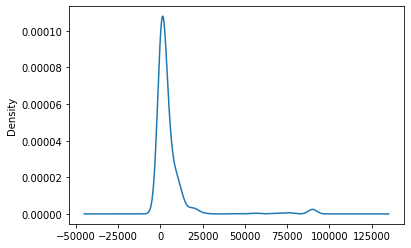

In [26]:
df['People_Hospitalized'].plot(kind = 'kde')

we will impute the values which are previous or after the missing values

In [27]:
df['People_Hospitalized'] = df.groupby('Province_State')['People_Hospitalized'].transform(
    lambda grp: grp.fillna(method = 'ffill'))

In [28]:
df.isnull().sum()

Province_State             0
Country_Region             0
Last_Update                0
Lat                        0
Long_                      0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
FIPS                       0
Incident_Rate              0
People_Tested              0
People_Hospitalized      251
Mortality_Rate             0
UID                        0
ISO3                       0
Testing_Rate               0
Hospitalization_Rate    1993
dtype: int64

In [29]:
df['People_Hospitalized'] = df.groupby('Province_State')['People_Hospitalized'].transform(
    lambda grp: grp.fillna(method = 'bfill'))

In [30]:
df['Hospitalization_Rate'] = df.groupby('Province_State')['Hospitalization_Rate'].transform(
    lambda grp: grp.fillna(method = 'ffill'))

In [31]:
df['Hospitalization_Rate'] = df.groupby('Province_State')['Hospitalization_Rate'].transform(
    lambda grp: grp.fillna(method = 'bfill'))

In [32]:
df[df['People_Hospitalized'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
44,Puerto Rico,US,2020-05-29 02:32:58,18.2208,-66.5901,3486,131,0.0,3355.0,72.0,118.837884,3486.0,NaN,3.757889,630.0,PRI,118.837884,NaN
102,Puerto Rico,US,2020-05-25 02:32:50,18.2208,-66.5901,3189,127,0.0,3062.0,72.0,108.713142,3189.0,NaN,3.982440,630.0,PRI,108.713142,NaN
160,Puerto Rico,US,2020-05-11 02:32:34,18.2208,-66.5901,2198,111,0.0,2087.0,72.0,74.929911,2198.0,NaN,5.050045,630.0,PRI,74.929911,NaN
218,Puerto Rico,US,2020-06-18 04:33:30,18.2208,-66.5901,6003,147,0.0,5856.0,72.0,204.642518,6003.0,NaN,2.448776,630.0,PRI,204.642518,NaN
276,Puerto Rico,US,2020-05-30 02:32:55,18.2208,-66.5901,3647,132,0.0,3515.0,72.0,124.326381,3647.0,NaN,3.619413,630.0,PRI,124.326381,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,Puerto Rico,US,2020-05-02 02:32:31,18.2208,-66.5901,1575,94,0.0,1481.0,72.0,53.691815,10888.0,NaN,5.968254,630.0,PRI,371.172370,NaN
6325,Puerto Rico,US,2020-07-31 04:35:31,18.2208,-66.5901,16572,214,0.0,16358.0,72.0,564.940165,322544.0,NaN,1.291335,630.0,PRI,10995.538295,NaN
6383,Puerto Rico,US,2020-04-25 06:32:46,18.2208,-66.5901,1276,77,0.0,1199.0,72.0,43.498893,10589.0,NaN,6.034483,630.0,PRI,360.979448,NaN
6442,Puerto Rico,US,2020-06-26 04:33:54,18.2208,-66.5901,6877,151,0.0,6726.0,72.0,234.437214,6877.0,NaN,2.195725,630.0,PRI,234.437214,NaN


In [33]:
df = df[df['Province_State'] != 'Puerto Rico']

In [34]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [35]:
df.shape

(6048, 18)

In [36]:
df.drop('Country_Region', axis = 1, inplace = True)

In [37]:
df.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,2020-05-29 02:32:58,32.3182,-86.9023,16530,591,9355.0,6584.0,1.0,337.127806,200481.0,1765.0,3.575318,84000001.0,USA,4088.791265,10.677556
1,Alaska,2020-05-29 02:32:58,61.3707,-152.4044,424,10,366.0,48.0,2.0,57.959524,47970.0,39.0,2.358491,84000002.0,USA,6557.354640,12.420382
3,Arizona,2020-05-29 02:32:58,33.7298,-111.4312,17877,860,4452.0,12565.0,4.0,245.606472,202914.0,2848.0,4.810651,84000004.0,USA,2787.771526,15.931085
4,Arkansas,2020-05-29 02:32:58,34.9697,-92.3731,6538,125,4583.0,1830.0,5.0,216.647602,118902.0,640.0,1.911900,84000005.0,USA,3940.017311,9.788926
5,California,2020-05-29 02:32:58,36.1162,-119.6816,103813,3993,0.0,99820.0,6.0,262.736420,1790559.0,4892.0,3.846339,84000006.0,USA,4531.658469,16.044079


## Exploratory Data Analysis

In [38]:
df.groupby("Province_State")[['Confirmed', 'Recovered', 'Deaths']].sum().sort_values(by = 'Confirmed',ascending = False).head(10)

,Confirmed,Recovered,Deaths
Province_State,,,
New York,39984763,6787204.0,3164658
California,19845648,0.0,521024
New Jersey,16873756,2545896.0,1287224
Florida,14783665,-102000.0,322027
Texas,14714968,8157723.0,240482
Illinois,12618458,0.0,579827
Massachusetts,10180134,2765188.0,706398
Pennsylvania,8503000,4617766.0,570365
Georgia,7661863,0.0,241027


In [39]:
df[(df['Province_State'] == 'Florida') & (df['Recovered']<0)]

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
768,Florida,2020-04-14 00:42:00,27.7663,-81.6868,21019,499,-102000.0,122520.0,12.0,579.387193,196207.0,2833.0,0.405628,84000012.0,USA,924.083459,2.302896


We will remove this instance as active cases cannot be higher than confirmed cases

In [40]:
df.drop(768, inplace = True)

## Exploratory Data Analysis

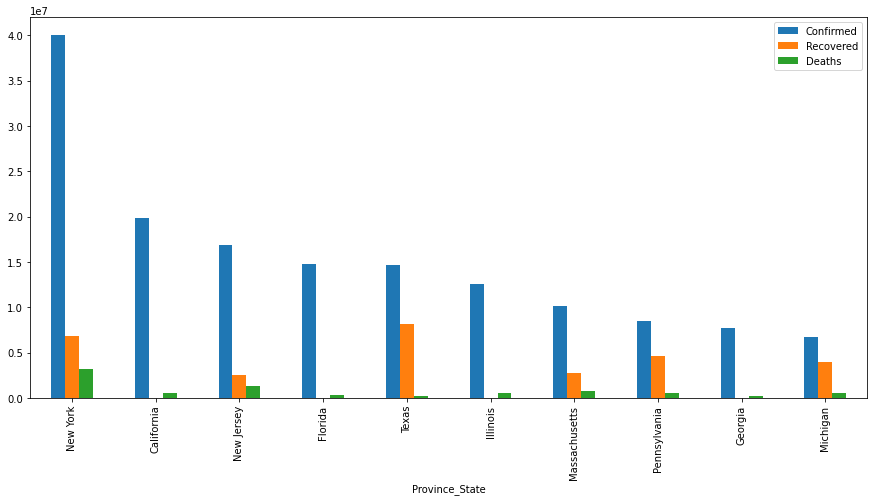

In [41]:
df.groupby("Province_State")[['Confirmed', 'Recovered', 'Deaths']].sum().sort_values(by = 
                                                                                     'Confirmed',ascending = False).head(10).plot(kind = 'bar', figsize = (15,7))

These are the top ten states in US in terms of COVID -19 cases

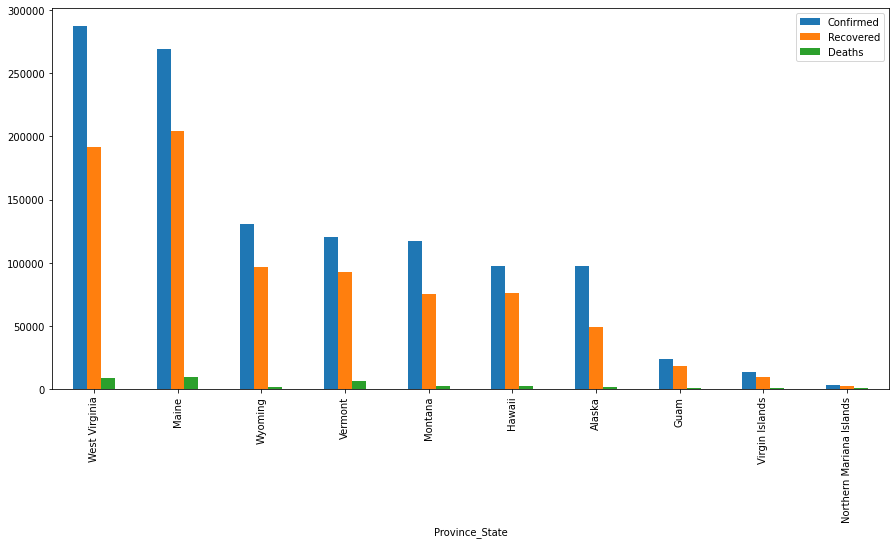

In [42]:
df.groupby("Province_State")[['Confirmed', 'Recovered', 'Deaths']].sum().sort_values(by = 
                                                                                     'Confirmed',ascending = False).tail(10).plot(kind = 'bar', figsize = (15,7))

These are the last 10 states in terms of covid - 19 cases.
They are also some of the least populated states in US.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6047 entries, 0 to 6513
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        6047 non-null   object        
 1   Last_Update           6047 non-null   datetime64[ns]
 2   Lat                   6047 non-null   float64       
 3   Long_                 6047 non-null   float64       
 4   Confirmed             6047 non-null   int64         
 5   Deaths                6047 non-null   int64         
 6   Recovered             6047 non-null   float64       
 7   Active                6047 non-null   float64       
 8   FIPS                  6047 non-null   float64       
 9   Incident_Rate         6047 non-null   float64       
 10  People_Tested         6047 non-null   float64       
 11  People_Hospitalized   6047 non-null   float64       
 12  Mortality_Rate        6047 non-null   float64       
 13  UID               

In [44]:
df['Last_Update'].min() - df['Last_Update'].max()

Timedelta('-112 days +18:43:10')

We have 112 days of data

lets make a new dataframe consisting of total US data

In [45]:
us = df.groupby("Last_Update")[['Confirmed', 'Active', 'Recovered', 'Deaths', 'People_Tested']].sum().reset_index()
us.tail()

,Last_Update,Confirmed,Active,Recovered,Deaths,People_Tested
108,2020-07-29 04:35:24,4340214,2835753.0,1355363.0,149098,52662728.0
109,2020-07-30 04:35:17,4410769,2870845.0,1389425.0,150499,53502375.0
110,2020-07-31 04:35:31,4478291,2912298.0,1414155.0,151838,54321134.0
111,2020-08-01 04:36:46,4545105,2953853.0,1438160.0,153092,55049193.0
112,2020-08-02 04:35:05,4602420,2986316.0,1461885.0,154219,55761149.0


Text(0, 0.5, 'Frequency')

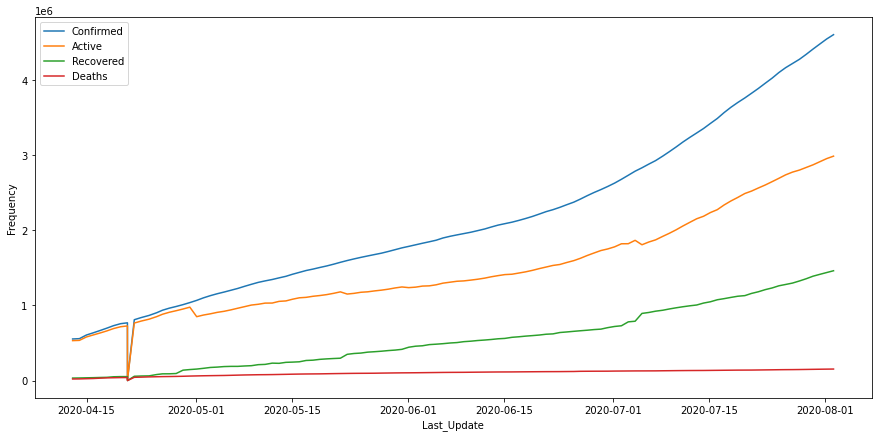

In [46]:
plt.figure().set_size_inches(15,7)
sns.lineplot(x = 'Last_Update', y = "Confirmed", data = us, label = 'Confirmed')
sns.lineplot(x = 'Last_Update', y = "Active", data = us, label = 'Active')
sns.lineplot(x = 'Last_Update', y = "Recovered", data = us, label = 'Recovered')
sns.lineplot(x = 'Last_Update', y = "Deaths", data = us, label = 'Deaths')

plt.ylabel("Frequency")

In [47]:
us.drop(9, inplace = True)

Text(0, 0.5, 'Frequency')

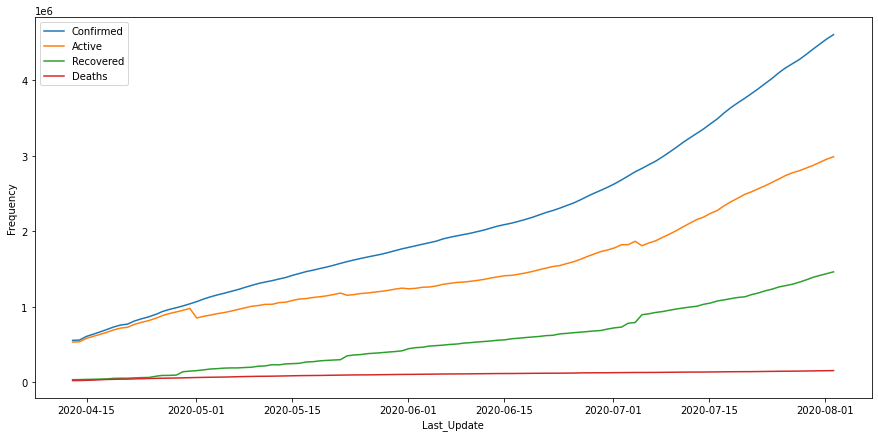

In [48]:
plt.figure().set_size_inches(15,7)
sns.lineplot(x = 'Last_Update', y = "Confirmed", data = us, label = 'Confirmed')
sns.lineplot(x = 'Last_Update', y = "Active", data = us, label = 'Active')
sns.lineplot(x = 'Last_Update', y = "Recovered", data = us, label = 'Recovered')
sns.lineplot(x = 'Last_Update', y = "Deaths", data = us, label = 'Deaths')
plt.ylabel("Frequency")

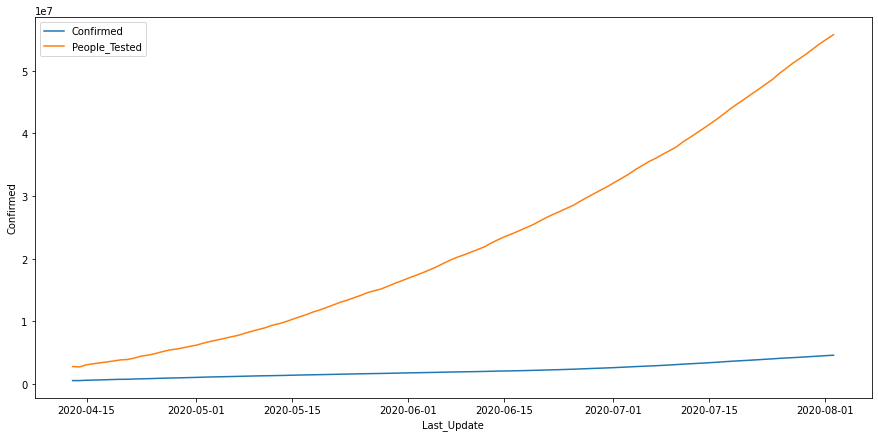

In [49]:
plt.figure().set_size_inches(15,7)
sns.lineplot(x = 'Last_Update', y = "Confirmed", data = us, label = 'Confirmed')
sns.lineplot(x = 'Last_Update', y = "People_Tested", data = us, label = 'People_Tested')


SO majority of the people who are tested are testing negative. 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6047 entries, 0 to 6513
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        6047 non-null   object        
 1   Last_Update           6047 non-null   datetime64[ns]
 2   Lat                   6047 non-null   float64       
 3   Long_                 6047 non-null   float64       
 4   Confirmed             6047 non-null   int64         
 5   Deaths                6047 non-null   int64         
 6   Recovered             6047 non-null   float64       
 7   Active                6047 non-null   float64       
 8   FIPS                  6047 non-null   float64       
 9   Incident_Rate         6047 non-null   float64       
 10  People_Tested         6047 non-null   float64       
 11  People_Hospitalized   6047 non-null   float64       
 12  Mortality_Rate        6047 non-null   float64       
 13  UID               

In [51]:
us = df.groupby("Last_Update")[['Last_Update','Incident_Rate', 'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']].mean().reset_index()

In [52]:
us

,Last_Update,Incident_Rate,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,2020-04-12 23:18:15,136.422748,3.262693,970.429760,13.993656
1,2020-04-13 23:07:54,143.678079,3.312437,1027.314828,14.237805
2,2020-04-14 23:33:31,150.234671,3.458756,1073.643890,14.874751
3,2020-04-15 22:56:51,157.176738,3.539449,1127.269518,14.723838
4,2020-04-16 23:30:51,165.333145,3.653159,1173.738964,14.200187
...,...,...,...,...,...
108,2020-07-29 04:35:24,1084.446725,3.058574,15446.240494,10.580430
109,2020-07-30 04:35:17,1101.515115,3.047882,15699.669429,10.541281
110,2020-07-31 04:35:31,1118.018013,3.036976,15915.988829,9.546423
111,2020-08-01 04:36:46,1134.916408,3.024028,16107.996244,10.497879


Text(0, 0.5, 'Frequency')

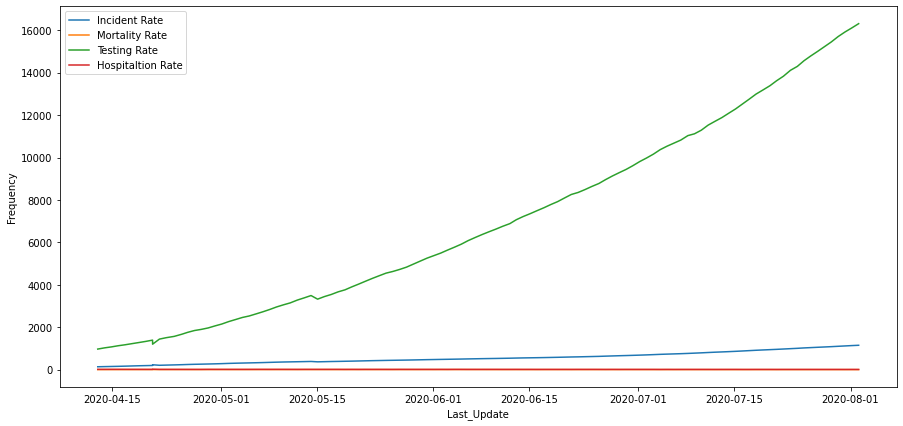

In [53]:
plt.figure().set_size_inches(15,7)
sns.lineplot(x = 'Last_Update', y = "Incident_Rate", data = us, label = 'Incident Rate')
sns.lineplot(x = 'Last_Update', y = "Mortality_Rate", data = us, label = 'Mortality Rate')
sns.lineplot(x = 'Last_Update', y = "Testing_Rate", data = us, label = 'Testing Rate')
sns.lineplot(x = 'Last_Update', y = "Hospitalization_Rate", data = us, label = 'Hospitaltion Rate')
plt.ylabel("Frequency")

So Mortality rate and Hospitalization rate remained same, but Incident Rate and Testing Rate increased a lot

Lets see how the top states in behaved in No of Confirmed cases 

In [54]:
top10 = list(df.groupby("Province_State")['Confirmed'].sum().sort_values(ascending = False).head(10).index)

In [55]:
top = df[df['Province_State'].isin(top10)]



In [56]:
top = top.groupby(["Province_State", 'Last_Update'])[['Confirmed', 'Recovered', 'Deaths', 'Active']].sum().reset_index()

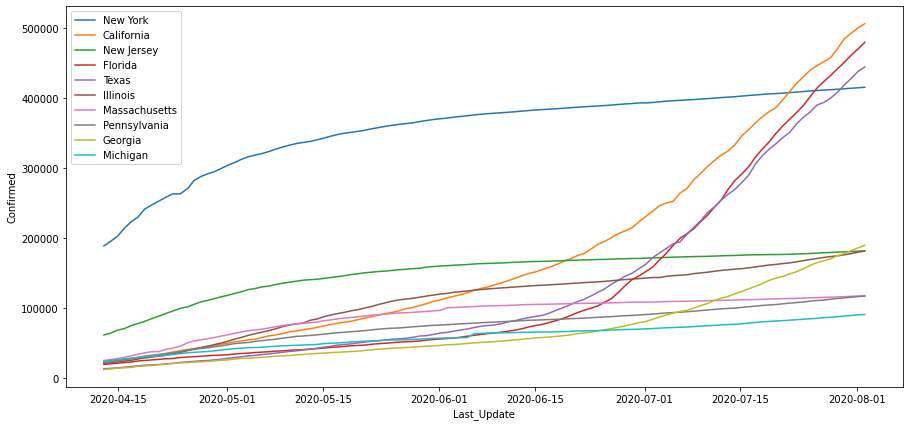

In [57]:
plt.figure().set_size_inches(15,7)
for i in top10:
    plot = top[top['Province_State'] == i][['Last_Update', 'Confirmed']]
    sns.lineplot(x = "Last_Update", y = 'Confirmed', data = plot, label = i)

New york, while getting a high increase in initial Confirmed cases, got the situation under control after 15-05-2020, but the 3 states: California, Florida and Texas got a high increase in number of cases after 15-06-2020, and now are increasing exponentially.

The confirmed cases in rest of the states are not too high and the curves seem to be flat

Lets Look at active cases

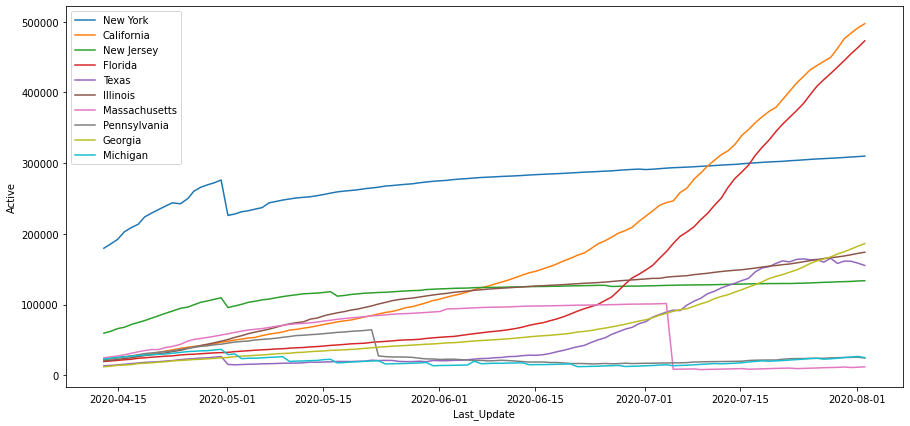

In [58]:
plt.figure().set_size_inches(15,7)
for i in top10:
    plot = top[top['Province_State'] == i][['Last_Update', 'Active']]
    sns.lineplot(x = "Last_Update", y = 'Active', data = plot, label = i)

The data on active cases fluctuates, but New York seems to have 300000 active cases constantly and seems to be increasing. The COVID cases in California and Florida are increasing exponentially,  which is a cause of major concern.

Only Michigan is Showing slight decrease in active cases

Lets look at death rate

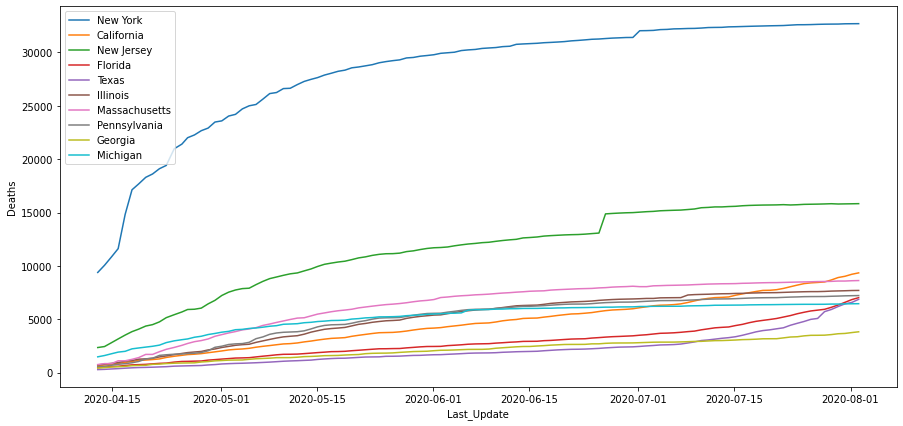

In [59]:
plt.figure().set_size_inches(15,7)
for i in top10:
    plot = top[top['Province_State'] == i][['Last_Update', 'Deaths']]
    sns.lineplot(x = "Last_Update", y = 'Deaths', data = plot, label = i)

New york and New Jersey are having very high Deaths, every state is increasing in death rate, but not as much as New York and New Jersey

Why New York is the worst hit state in US?

1. It is located in cold region
2. The population Density there is high.
3. People ignoring lockdown rules

## Time Series Analysis Using FBProphet

Here we will predict US COVID 19 cases. We will compare the results we get from the Model with the no. of Confirmed cases in US today

In [60]:
from fbprophet import Prophet

In [61]:
confirmed = df.groupby("Last_Update")['Confirmed'].sum().reset_index()
confirmed.head()

,Last_Update,Confirmed
0,2020-04-12 23:18:15,554264
1,2020-04-13 23:07:54,558545
2,2020-04-14 23:33:31,606595
3,2020-04-15 22:56:51,635224
4,2020-04-16 23:30:51,666606


In [62]:
confirmed['Last_Update'] = pd.to_datetime(confirmed['Last_Update']).dt.date
confirmed.tail()

,Last_Update,Confirmed
108,2020-07-29,4340214
109,2020-07-30,4410769
110,2020-07-31,4478291
111,2020-08-01,4545105
112,2020-08-02,4602420


In [63]:
confirmed['Last_Update'] = pd.to_datetime(confirmed['Last_Update'])

In [64]:
confirmed.columns = ['ds', 'y']

In [65]:
prophet_model = Prophet().fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
future = prophet_model.make_future_dataframe(periods = 123)        #Predicting what the confirmed cases would be for next 3 month
future.tail() 

,ds
230,2020-11-29
231,2020-11-30
232,2020-12-01
233,2020-12-02
234,2020-12-03


So we will be predicting what the total number of cases in US will be on 3-12-2020

In [67]:
forecast = prophet_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
230,2020-11-29,1.222804e+07,1.101142e+07,1.345912e+07
231,2020-11-30,1.224351e+07,1.102661e+07,1.348830e+07
232,2020-12-01,1.234874e+07,1.113492e+07,1.357541e+07
233,2020-12-02,1.241184e+07,1.116831e+07,1.364334e+07
234,2020-12-03,1.247425e+07,1.119422e+07,1.376644e+07


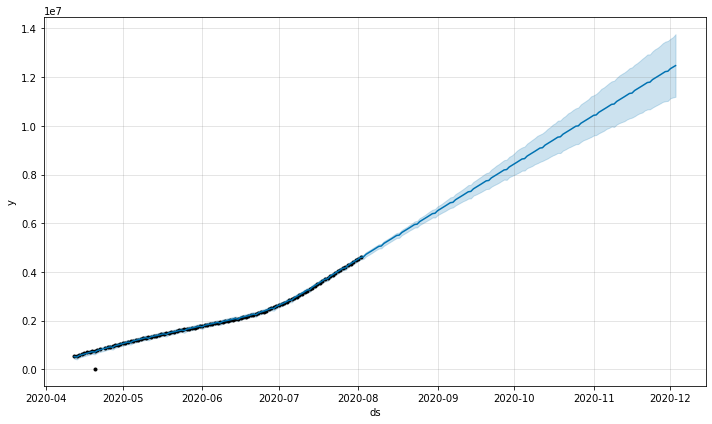

In [68]:
prophet_plot = prophet_model.plot(forecast)

The total cases in US for 3 -Dec 2020 was 14.1 million, our model is predicting max number of cases as 13.7 million, which is around 0.5 million less.

So the model is performing okay, the difference is not much

In [69]:
import pickle
filename = 'fbprophet'
pickle.dump(prophet_model, open(filename, 'wb'))